**NOTE: This project is done using Dataspell. So, importing of google collab may occur some issues.**

In [1]:
import PIL as pil   # Python Image Library 
from PIL import Image   
import numpy as np  # numpy is a library for scientific computing with Python
import matplotlib.pyplot as plt # matplotlib is a plotting library
import seaborn as sns   # seaborn is a library for making statistical graphics in Python


---
**5.1 Load and Prepare the data:**
---
---

*Importing image using ***pillow library***. After importing pillow library as **`pil`** I have still imported Image separately because sometimes jupyter notebooks fails to find the library `.Image` from the pillow library which can be simply solved by importing Image library only separately.*

Original Image:


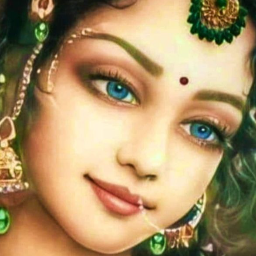

In [2]:
img = Image.open("Radha.png")   # opening the image file
print("Original Image:")    
img  # displaying the image

Converting the image into black and white image and creating an array of pixels of image using numpy.

Pixel type: uint8
Number of dimensions: 2
Image size: (256, 256)


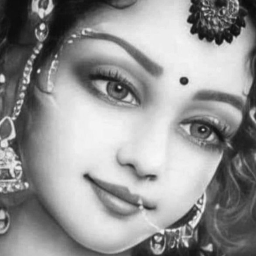

In [3]:
bw = img.convert("L")   # converting the image to black and white
bw_dim = np.array(bw)   # converting the image to a numpy array
print('Pixel type:', bw_dim.dtype)  # printing the data type of the numpy array
print('Number of dimensions:', bw_dim.ndim) # printing the number of dimensions of the numpy array
print('Image size:', bw_dim.shape)  # printing the size of the numpy array
bw  # displaying the image



---
**5.2 Standardize/Scale the data:**
---
---

The value of mean and standard deviation is calculated using the numpy library and numpy array. Then the pixels is standardized by using the formula `(x' = (x - x̄) / σ)`. Then every pixel is multiplied by 255 because 255 is a common scaling factor when working with grayscale images, as it is the maximum value that can be represented by an 8-bit pixel (since 2^8 = 256). By multiplying each element in the standardized_data list by 255, the values are scaled to the full 8-bit range, which can then be used to create a grayscale image.
Then creating an image object called scaled_image from the standardized_data. This image is initialized with the "L" mode, which stands for "luminance" and represents a grayscale image, and has a size of 256x256 pixels.

Converting the pixels in numpy array because working on numpy array is easier and faster than working on python array.

To put the pixels in the image we need to convert the numpy array to 1-D list. For that numpy provides default `.flatten()`. After converting the array to 1-D list, simply put the list to scaled_image which was previously made. For putting the value of pixels 1-D list pillow library provides a function named .putdata() which puts the value of 1-D list as pixels in the image. The image is saved after putting the values of pixels in the image.
Here image is being pre-processed, which is important step for machine learning or other purposes because it can improve the performance of some algorithm.

Pixel type: uint8
Number of dimensions: 2
Image size: (256, 256)


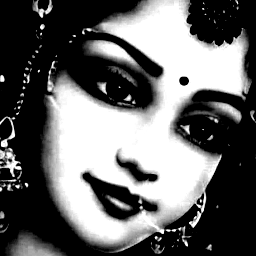

In [4]:
mean = np.mean(bw_dim)  # calculating the mean of the numpy array
std = np.std(bw_dim)    # calculating the standard deviation of the numpy array
standardized_data = np.array([(x - mean) / std for x in bw_dim])    # standardizing the numpy array
scaled_image = Image.fromarray(standardized_data)   # converting the standardized numpy array to an image
pixels = [(x * 255) for x in standardized_data] # converting the standardized numpy array to a list of pixels
scaled_image = pil.Image.new("L",(bw.height,bw.width))  # creating a new image
pixels=np.array(pixels) # converting the list of pixels to a numpy array

bw_list = pixels.flatten()  # flattening the numpy array
scaled_image.putdata(bw_list)   # putting the list of pixels into the new image
scaled_image.save("standardized_image.png")  # saving the new image
scaled_dim=np.array(scaled_image)   # converting the new image to a numpy array
print('Pixel type:', scaled_dim.dtype)  # printing the data type of the numpy array
print('Number of dimensions:', scaled_dim.ndim) # printing the number of dimensions of the numpy array
print('Image size:', scaled_dim.shape)  # printing the size of the numpy array
scaled_image    # displaying the image


---
**5.3 Calculate Covariance Matrix:**
---
---

First using the pillow libray the previously saved standardized_image is opened. Then the value pixels is opened as numpy array. Then the array is resized to the width and height of image for proper formatting. Then using the numpy library function the covariance matrix is calculated.

In [5]:
image = Image.open("standardized_image.png")    # opening the image file
pixels = np.array(image)    # converting the image to a numpy array
pixels = pixels.reshape((image.width, image.height))    # reshaping the numpy array
covariance_matrix = np.cov(pixels)  # calculating the covariance matrix of the numpy array
covariance_matrix   # displaying the covariance matrix

array([[5858.3879902 , 5915.7278799 , 5982.98216912, ..., -419.46231618,
        -690.021875  , -731.26084559],
       [5915.7278799 , 6214.62057292, 6392.94762561, ..., -361.32991728,
        -636.54872855, -677.62758885],
       [5982.98216912, 6392.94762561, 6729.82510723, ..., -328.04109988,
        -601.65096507, -642.58803615],
       ...,
       [-419.46231618, -361.32991728, -328.04109988, ..., 3191.09606311,
        3196.27529105, 3288.7042739 ],
       [-690.021875  , -636.54872855, -601.65096507, ..., 3196.27529105,
        3345.14643076, 3448.138894  ],
       [-731.26084559, -677.62758885, -642.58803615, ..., 3288.7042739 ,
        3448.138894  , 3568.89973958]])


---
*5.3.1.Representing the covariance matrix in 2x2 format*
---
---

***Slicing the covariance_matrix to get 2x2 matrix.***

In [6]:
small_cov_matrix_ = covariance_matrix[:2, :2]   # creating a 2x2 covariance matrix from the original covariance matrix
small_cov_matrix_   # displaying the 2x2 covariance matrix

array([[5858.3879902 , 5915.7278799 ],
       [5915.7278799 , 6214.62057292]])

---
*5.3.2.Representing the covariance matrix in 3x3*
---
---

***Slicing the covariance_matrix to get 3x3 matrix.***

In [7]:
small_cov_matrix = covariance_matrix[:3, :3]    # creating a 3x3 covariance matrix from the original covariance matrix
small_cov_matrix    # displaying the 3x3 covariance matrix

array([[5858.3879902 , 5915.7278799 , 5982.98216912],
       [5915.7278799 , 6214.62057292, 6392.94762561],
       [5982.98216912, 6392.94762561, 6729.82510723]])


---
*5.3.3.Visualizing the covariance matrix of the pixels of standardized image*
---
---

**5.3.3.1.Heat Map**

Creating a heatmap of a covariance_matrix using the `sns.heatmap` function from the seaborn library.

A heatmap is a graphical representation of data where the values are represented by colors. The `sns.heatmap` function takes a matrix of data and plots it as a heatmap, with each cell in the matrix represented by a color according to its value.

The `set_title` method is then used to set the title of the heatmap to "Correlation Heatmap" with a font size of 12 points and a padding of 40 points. Finally, the heatmap is displayed using the heatMap.set_title line.

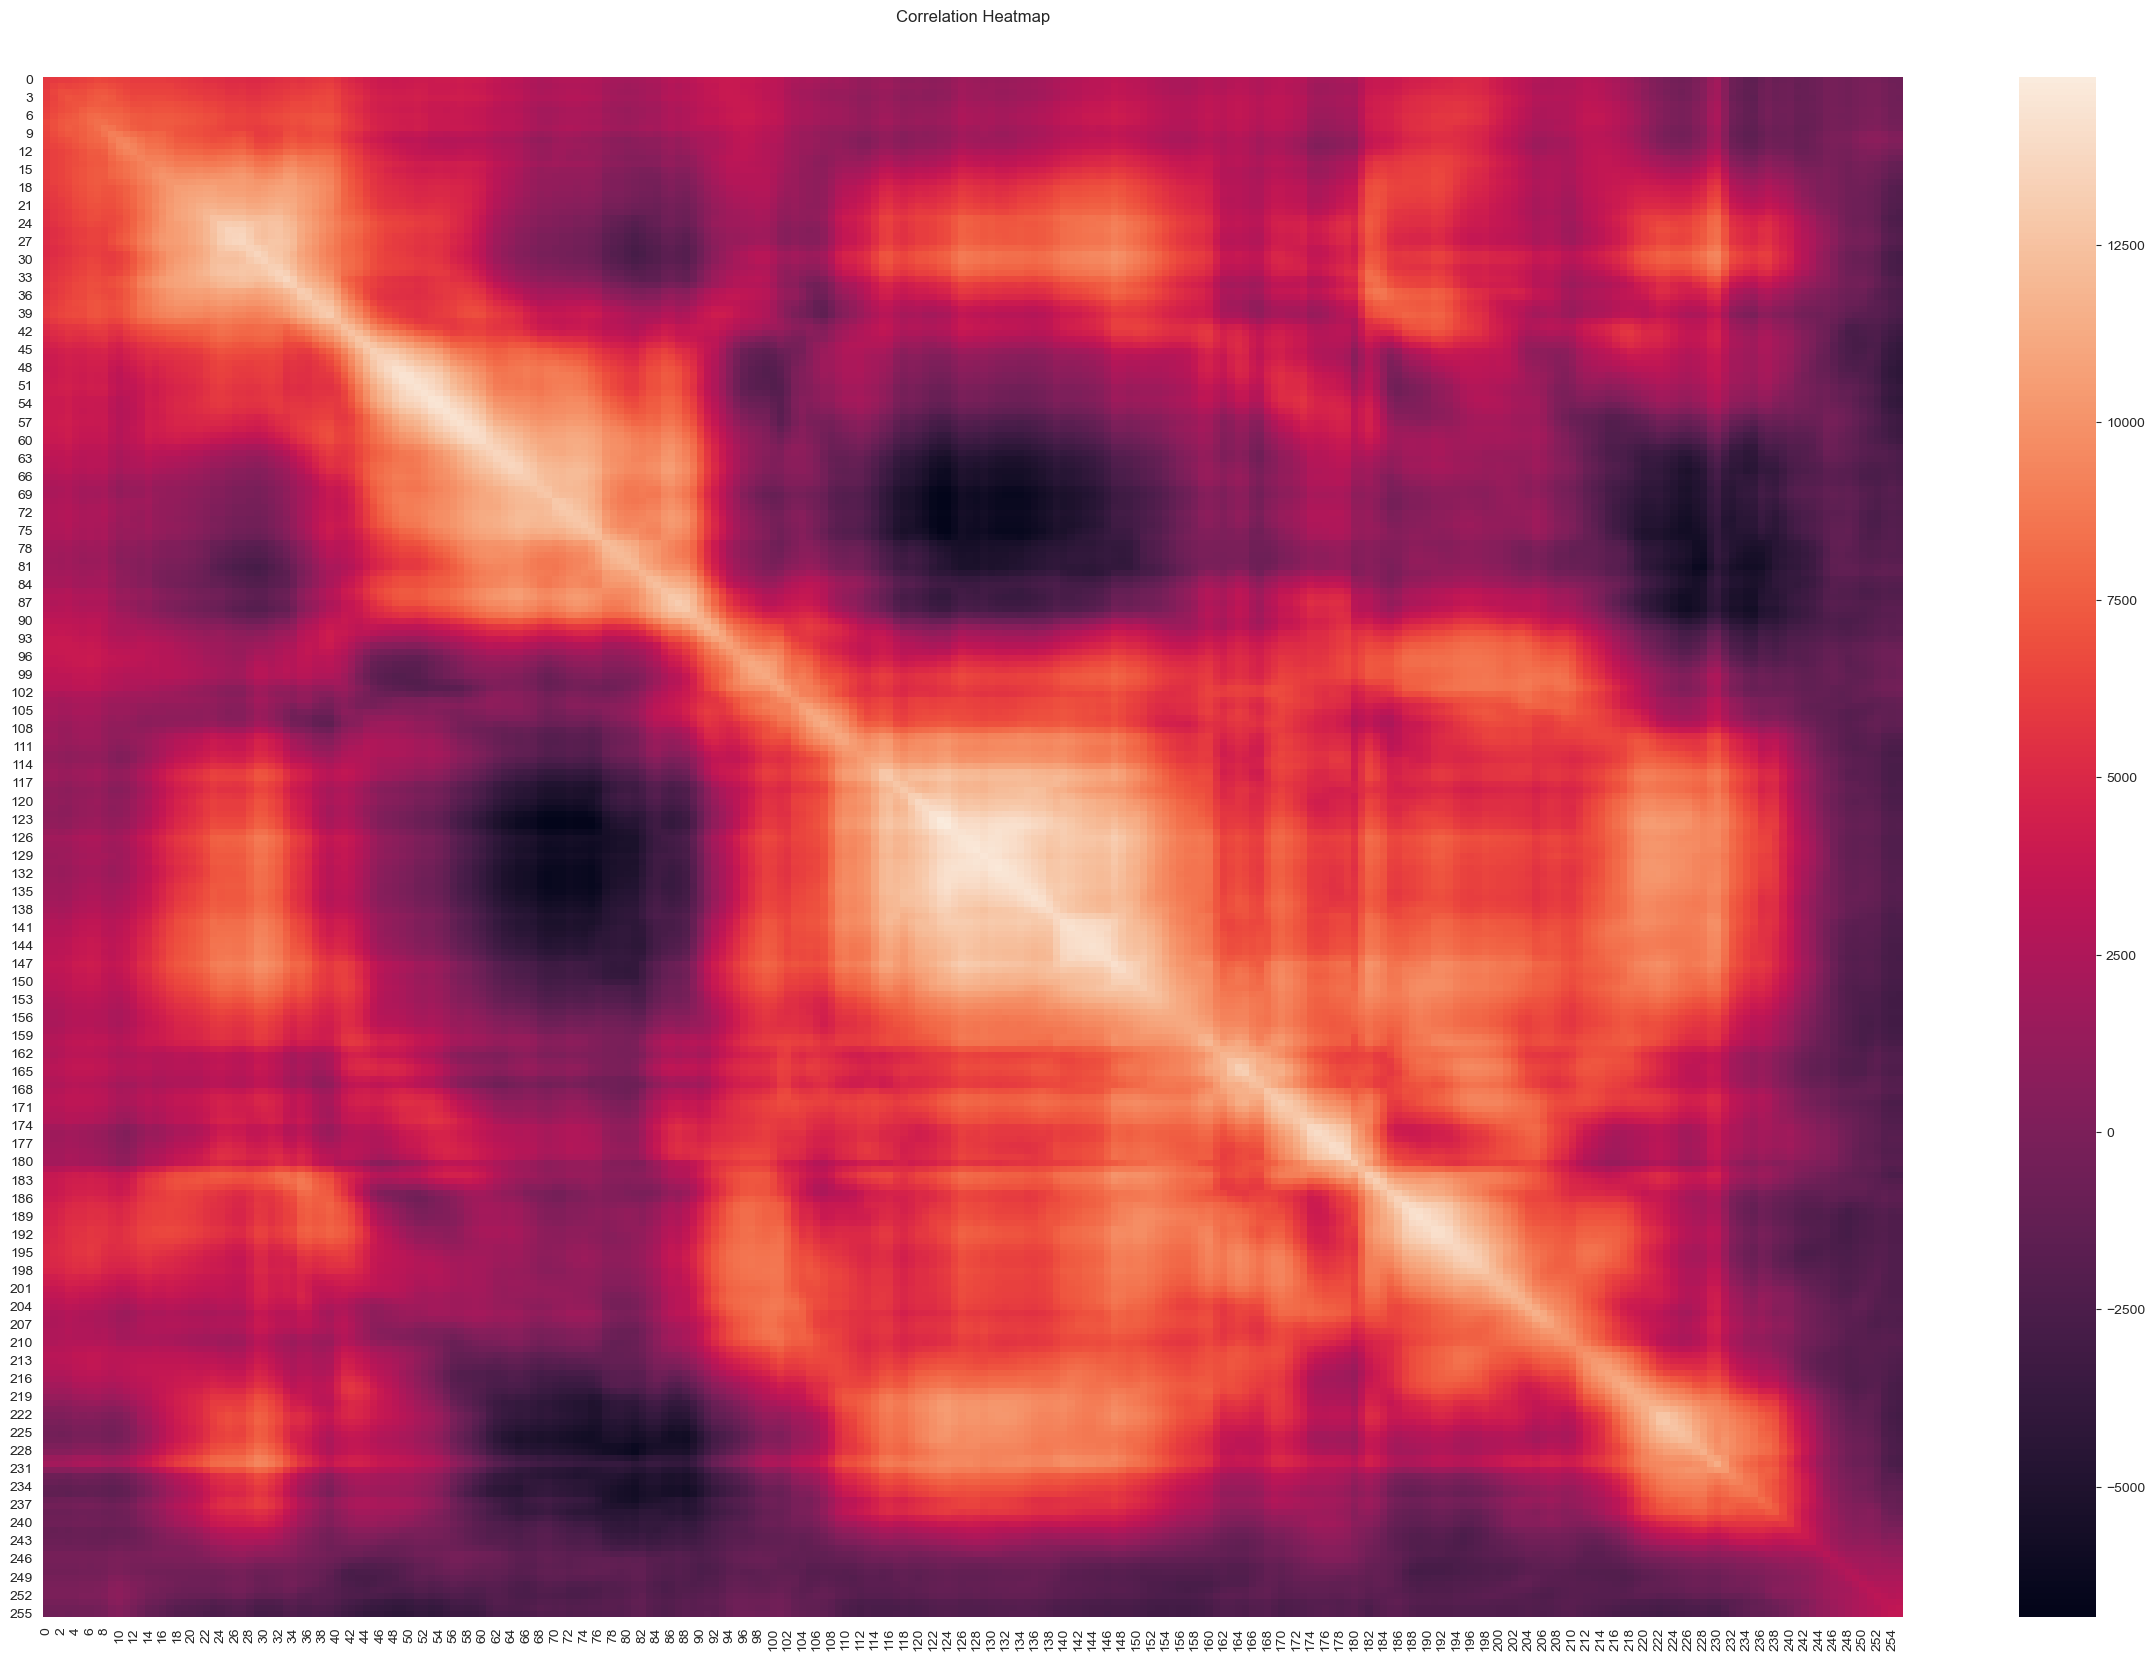

In [8]:
plt.figure(figsize=(30, 20))    # setting the size of the figure
heatMap = sns.heatmap(covariance_matrix)    # creating a heatmap of the covariance matrix
heatMap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=40);   # setting the title of the heatmap and the font size of the title and the padding of the title from the top of the heatmap


---
**5.4 Eigen Decomposition:**
---
---

**5.4.1.Calculating Eigen values and Eigen Vectors**

np.linalg.eig is a function from the NumPy library that calculates the eigenvalues and eigenvectors of a given matrix. The function takes a single argument, which is the matrix for which the eigenvalues and eigenvectors are to be calculated.

In [9]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)    # calculating the eigenvalues and eigenvectors of the covariance matrix

In [10]:
print("Eigen Values:")
eigenvalues

Eigen Values:


array([1.20541978e+06, 6.12002860e+05, 3.28641933e+05, 1.96776548e+05,
       1.07186347e+05, 1.06881390e+05, 6.98081700e+04, 5.62616540e+04,
       3.23703771e+04, 3.13595157e+04, 2.21759621e+04, 2.03555310e+04,
       1.61644146e+04, 1.40717134e+04, 1.24415408e+04, 1.15705783e+04,
       9.24480446e+03, 8.85560926e+03, 8.54500958e+03, 7.04432746e+03,
       6.72644336e+03, 6.62857129e+03, 6.36901134e+03, 5.82825488e+03,
       5.62365862e+03, 5.06293908e+03, 4.52702197e+03, 4.28131323e+03,
       4.11517027e+03, 3.60810975e+03, 3.37984829e+03, 2.92248860e+03,
       2.77123567e+03, 2.69917944e+03, 2.49972606e+03, 2.32952630e+03,
       2.05262683e+03, 2.03898214e+03, 1.71112641e+03, 1.61578954e+03,
       1.56551461e+03, 1.50663571e+03, 1.39050922e+03, 1.32859997e+03,
       1.27256195e+03, 1.21320132e+03, 1.18624683e+03, 1.10677726e+03,
       1.05440930e+03, 1.01098013e+03, 9.57037708e+02, 9.30747753e+02,
       9.11900393e+02, 8.83934503e+02, 8.51749098e+02, 8.07232469e+02,
      

In [11]:
print("Eigen Vectors:")
eigenvectors

Eigen Vectors:


array([[-0.03364345, -0.05276284, -0.02139262, ...,  0.03093112,
         0.02640498,  0.05094926],
       [-0.03436466, -0.05215268, -0.02553115, ..., -0.06995581,
        -0.0893196 , -0.13795724],
       [-0.03496556, -0.05385788, -0.02743003, ...,  0.07845612,
         0.10580541,  0.07739267],
       ...,
       [ 0.02302439,  0.02236136,  0.00825993, ...,  0.03997945,
        -0.02614075, -0.02368459],
       [ 0.02519413,  0.02399235,  0.01241582, ..., -0.14805743,
         0.17257648,  0.18964333],
       [ 0.02554606,  0.02507967,  0.01546496, ...,  0.22897708,
        -0.09456724, -0.07028147]])

Creating an eigen pairs for corresponding eigen value and eigen vector. The pair is created in tuple and stored inside a list.

Sorting the list of eigen_pairs in descending order based on the eigen value. This is done using the sorted function and the key parameter, which specifies a function to be used to extract a comparison key from each element in the list. In this case, the lambda function is used as the key, which returns the eigenvalue. This causes the list to be sorted in descending order based on the eigenvalues. The resulting sorted list is assigned to the variable sorted_eigen_pairs.

### ***Why sorted Eigen values?***

Without sorting the eigenvalues, it would be difficult to identify which eigenvalues belong to the most important principal components, and it would be impossible to choose the three dimensions that best reflect the variance in the data. For the dimensionality reduction and reconstruction processes, the third-greatest eigenvalues and accompanying eigenvectors may be easily found by sorting the eigenvalues in decreasing order.

In [12]:
eigen_pairs = [(np.abs(eigenvalues[i]), eigenvectors[:, i]) for i in range(len(eigenvalues))]   # creating a list of tuples of the eigenvalues and eigenvectors
sorted_eigen_pairs = sorted(eigen_pairs, key=lambda x: -x[0])   # sorting the list of tuples in descending order

The eigen values and vector are stored in tuple. Eigen values lies at 0th index of tuple while Eigen vector lies at 1st index of tuple. So, here we have separated them. The eigen values and eigen vectors are stored in different variable which is sorted.

In [13]:
sorted_eigen_values = np.array([pair[0] for pair in sorted_eigen_pairs])    # creating a numpy array of the sorted eigenvalues
sorted_eigen_values  # displaying the sorted eigenvalues

array([1.20541978e+06, 6.12002860e+05, 3.28641933e+05, 1.96776548e+05,
       1.07186347e+05, 1.06881390e+05, 6.98081700e+04, 5.62616540e+04,
       3.23703771e+04, 3.13595157e+04, 2.21759621e+04, 2.03555310e+04,
       1.61644146e+04, 1.40717134e+04, 1.24415408e+04, 1.15705783e+04,
       9.24480446e+03, 8.85560926e+03, 8.54500958e+03, 7.04432746e+03,
       6.72644336e+03, 6.62857129e+03, 6.36901134e+03, 5.82825488e+03,
       5.62365862e+03, 5.06293908e+03, 4.52702197e+03, 4.28131323e+03,
       4.11517027e+03, 3.60810975e+03, 3.37984829e+03, 2.92248860e+03,
       2.77123567e+03, 2.69917944e+03, 2.49972606e+03, 2.32952630e+03,
       2.05262683e+03, 2.03898214e+03, 1.71112641e+03, 1.61578954e+03,
       1.56551461e+03, 1.50663571e+03, 1.39050922e+03, 1.32859997e+03,
       1.27256195e+03, 1.21320132e+03, 1.18624683e+03, 1.10677726e+03,
       1.05440930e+03, 1.01098013e+03, 9.57037708e+02, 9.30747753e+02,
       9.11900393e+02, 8.83934503e+02, 8.51749098e+02, 8.07232469e+02,
      

In [14]:
sorted_eigen_vectors = np.array([pair[1] for pair in sorted_eigen_pairs])   # creating a numpy array of the sorted eigenvectors
sorted_eigen_vectors    # displaying the sorted eigenvectors

array([[-0.03364345, -0.03436466, -0.03496556, ...,  0.02302439,
         0.02519413,  0.02554606],
       [-0.05276284, -0.05215268, -0.05385788, ...,  0.02236136,
         0.02399235,  0.02507967],
       [-0.02139262, -0.02553115, -0.02743003, ...,  0.00825993,
         0.01241582,  0.01546496],
       ...,
       [ 0.07302273, -0.05172844,  0.04209158, ..., -0.0617178 ,
         0.19206171, -0.17336915],
       [-0.05967827,  0.14738757, -0.10344064, ..., -0.01065256,
         0.15975348, -0.10574442],
       [ 0.02275552, -0.10080185,  0.11181408, ...,  0.12783955,
        -0.0075559 , -0.13360452]])


---
**5.5 Identify Principal Components:**
---
---

Explained variance is a measure of how much of the variance in a dataset (here dataset are pixels) is captured by each principal component in a principal component analysis (PCA). It is calculated by dividing the eigenvalue for each component by the sum of all eigenvalues.
Why explained variance is calculated?
1. It helps us in determining how much of the variance in the raw data is preserved in the transformed data. The first few components will capture a large portion of the variance in the data if the explained variance for those components is high. This is helpful in determining how many dimensions to preserve when the dimensionality of the data is reduced.
2. It enables us to comprehend how much data is lost when the dimensionality of the data is decreased. The amount of information in the original data is being retained if the explained variance for the first few components is high. It may be appropriate to eliminate the later components if the explained variance for those components is low, indicating that they are capturing less variance in the data.
3. It enables us to see how much variance each component is able to capture. We can determine how much of the variance is accounted for by the initial few components and how much is accounted for by the later components by plotting the explained variance for each component. When the dimensionality of the data is reduced, this can be helpful in determining how many dimensions to preserve.
Here at first explained variance is calculated by dividing all the eigen values by the sum of eigen values. This can be also known as individual explained variance. Then cumulative explained variance is calculated for each component. It does this by using the np.cumsum function to calculate the cumulative sum of the explained variance array. The cumulative explained variance represents the total amount of variance captured by the first, second, third, etc. principal components.

In [15]:
explained_variance = eigenvalues / sum(eigenvalues)   # calculating the explained variance of the eigenvalues 
cumulative_explained_variance = np.cumsum(explained_variance)   # calculating the cumulative explained variance of the eigenvalues 
cumulative_explained_variance   # displaying the cumulative explained variance of the eigenvalues

array([0.40292641, 0.6074959 , 0.71734852, 0.7831235 , 0.81895186,
       0.85467828, 0.87801252, 0.89681867, 0.90763887, 0.91812117,
       0.92553376, 0.93233785, 0.937741  , 0.94244464, 0.94660338,
       0.95047099, 0.95356118, 0.95652128, 0.95937755, 0.9617322 ,
       0.9639806 , 0.96619628, 0.9683252 , 0.97027337, 0.97215315,
       0.9738455 , 0.97535871, 0.97678979, 0.97816534, 0.97937139,
       0.98050115, 0.98147803, 0.98240435, 0.98330658, 0.98414214,
       0.98492082, 0.98560693, 0.98628849, 0.98686045, 0.98740055,
       0.98792384, 0.98842745, 0.98889225, 0.98933635, 0.98976172,
       0.99016725, 0.99056376, 0.99093372, 0.99128617, 0.9916241 ,
       0.991944  , 0.99225512, 0.99255993, 0.9928554 , 0.9931401 ,
       0.99340993, 0.99366482, 0.99391289, 0.99415795, 0.99439019,
       0.99461015, 0.99482685, 0.99502621, 0.99521916, 0.99539825,
       0.99556807, 0.99573134, 0.99588831, 0.99604318, 0.99619193,
       0.99631617, 0.99644759, 0.99658656, 0.99672811, 0.99684

**5.5.1.Graphical representation of Individual Explained Variance and Cumulative Explained Variance**

The below chart helps us visualizes the explained variance and cumulative explained variance for a principal component analysis (PCA).
The x-axis of the chart represents the principal components (i.e., the dimensions of the transformed data), and the y-axis represents the explained variance ratio (i.e., the percentage of the total variance captured by each component).
The chart shows how much of the variance in the original data is captured by each principal component, and how the cumulative explained variance changes as more principal components are added.

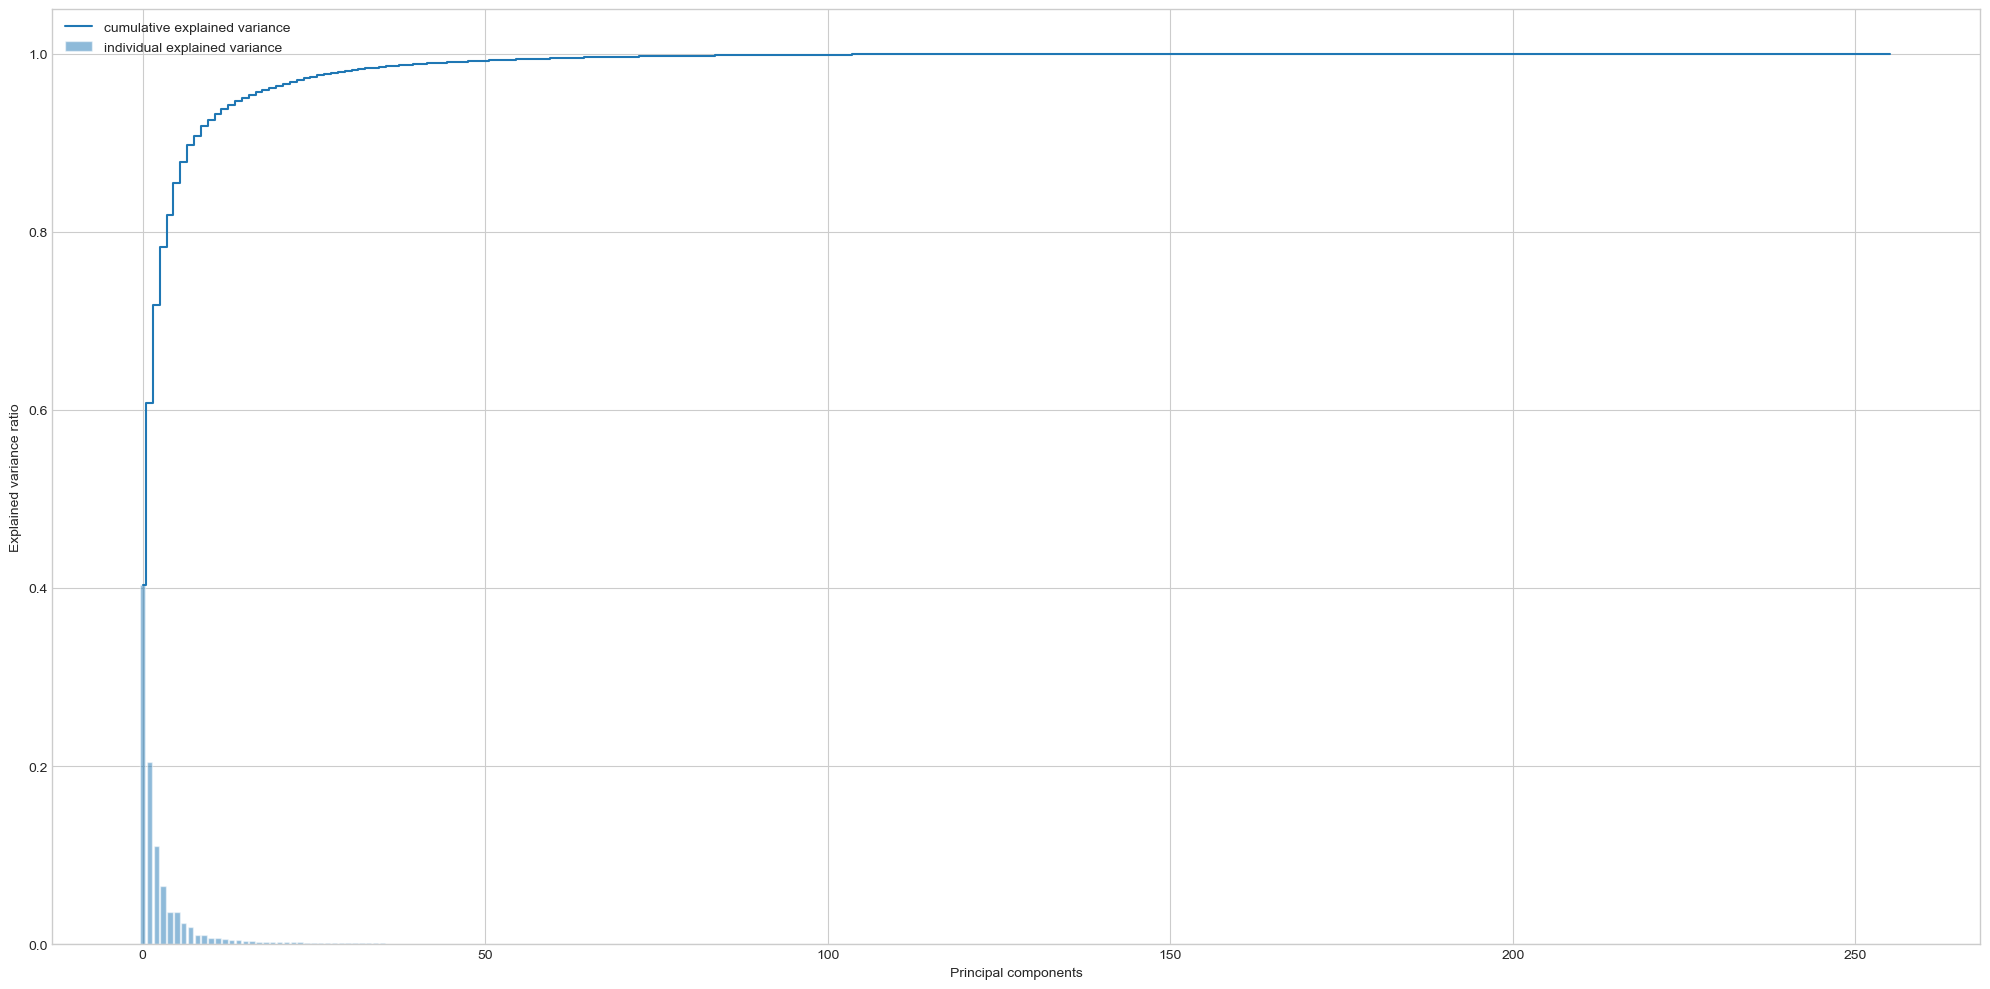

In [16]:
with plt.style.context('seaborn-whitegrid'):    # setting the style of the plot to seaborn-whitegrid style 
    plt.figure(figsize=(20, 10))        # setting the size of the figure 

    plt.bar(range(len(explained_variance)), explained_variance, alpha=0.5, align='center',      
            label='individual explained variance')      # creating a bar plot of the explained variance of the eigenvalues 
    plt.step(range(len(cumulative_explained_variance)), cumulative_explained_variance, where='mid',
             label='cumulative explained variance')     # creating a step plot of the cumulative explained variance of the eigenvalues 
    plt.ylabel('Explained variance ratio')      # setting the y-axis label of the plot
    plt.xlabel('Principal components')    # setting the x-axis label of the plot
    plt.legend(loc='best')      # setting the location of the legend of the plot
    plt.tight_layout()    # setting the tight layout of the plot
    plt.savefig('pca2.pdf')     # saving the plot as a pdf file

n_eigenvalues determine how many combination of principal components are to be selected. The selected_eigenvalues select n_eigenvalues of row from sorted_eigen_values and selected_eigenvectors selects n-eigenvalues of column from sorted_eigen_vectors.
The projection represents the transformed data in the new space defined by the principal components. Projection is calculated by dot multiplication of pixels and selected_eigenvectors. Reconstruct is the dot multiplication of projection and transpose of selected_eigenvectors. It gives the value of all pixels for an image to be reconstructed.

In [17]:
n_eigenvalues = 3   # setting the number of eigenvalues to be selected
# selected_eigenvalues = sorted_eigen_values[:n_eigenvalues]    # selecting the first n_eigenvalues eigenvalues from the sorted eigenvalues
selected_eigenvectors = sorted_eigen_vectors[:, :n_eigenvalues]  # selecting the first n_eigenvalues eigenvectors from the sorted eigenvectors

projection = np.dot(pixels, selected_eigenvectors)  # projecting the pixels onto the selected eigenvectors 
reconstruction = np.dot(projection, selected_eigenvectors.T)    # reconstructing the pixels from the projected pixels onto the selected eigenvectors 


---
**5.6.Reconstruction of the image:**
---
---

The reconstruction is first made numpy array by changing its datatype to np.unit8. Then the image is made using the array. The image is the reconstructed image of standardized image.

Image size: (256, 256)


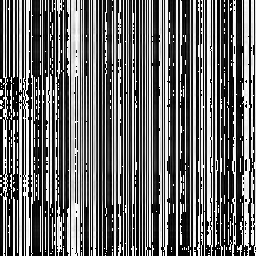

In [18]:
reconstruction = np.asarray(reconstruction, dtype=np.uint8) # converting the reconstructed pixels to a numpy array of unsigned integers 
reconstructed_image = Image.fromarray(reconstruction)   # converting the reconstructed pixels to an image 
print('Image size:', reconstructed_image.size)  # printing the size of the reconstructed image 
reconstructed_image   # displaying the reconstructed image

**If we want more refined images than we need to increase the number of combination of principal components**

Image size: (256, 256)


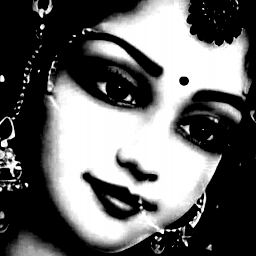

In [19]:
n_eigenvalues = bw.height
selected_eigenvalues = sorted_eigen_values[:n_eigenvalues]
selected_eigenvectors = sorted_eigen_vectors[:, :n_eigenvalues]

projection = np.dot(pixels, selected_eigenvectors)
reconstruction = np.dot(projection, selected_eigenvectors.T)
reconstruction = np.asarray(reconstruction, dtype=np.uint8)
reconstructed_image = Image.fromarray(reconstruction)
print('Image size:', reconstructed_image.size)
reconstructed_image